<h1 align="center">Emanuele Alessi & Ivan Ferrante</h1>

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_id = train['Id']
test_id = test['Id']

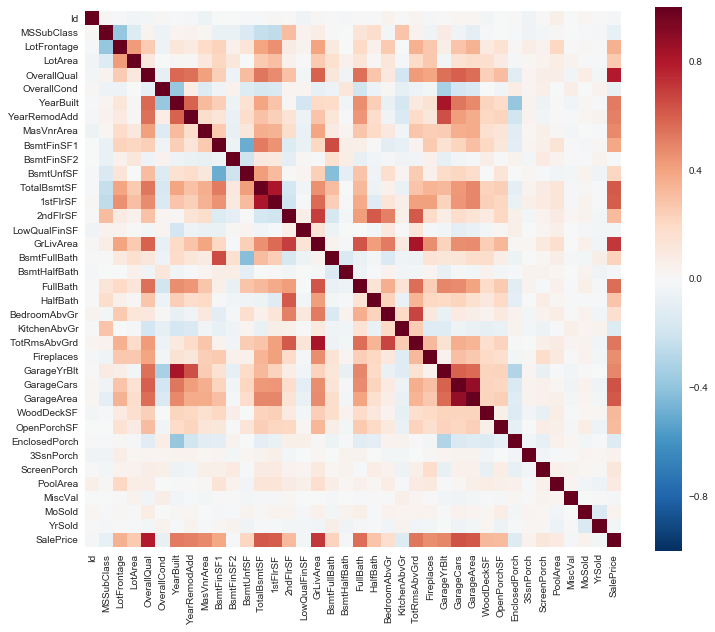

In [3]:
#Plot of the correlation matrix
corrmat = train.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, square=True)
plt.show()

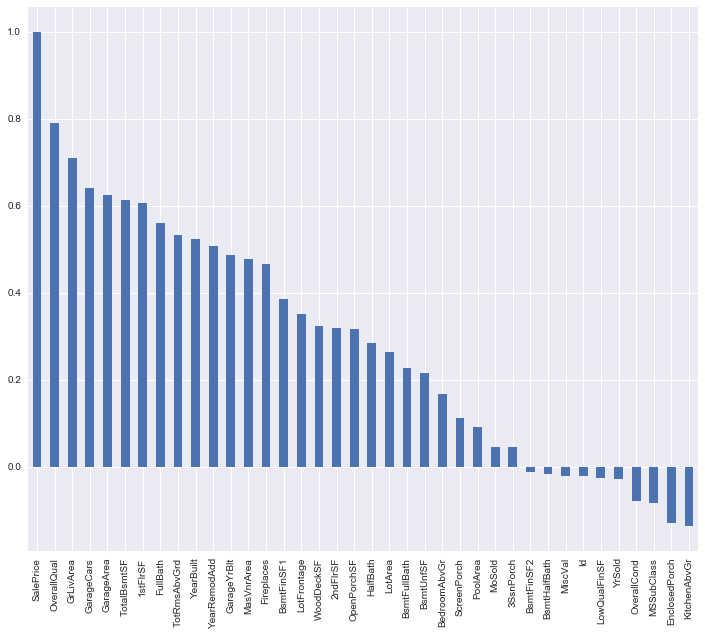

In [4]:
#Plot of the features that have the greatest impact on the price
plt.figure(figsize = (12, 10))
corrmat['SalePrice'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

## Feature engineering

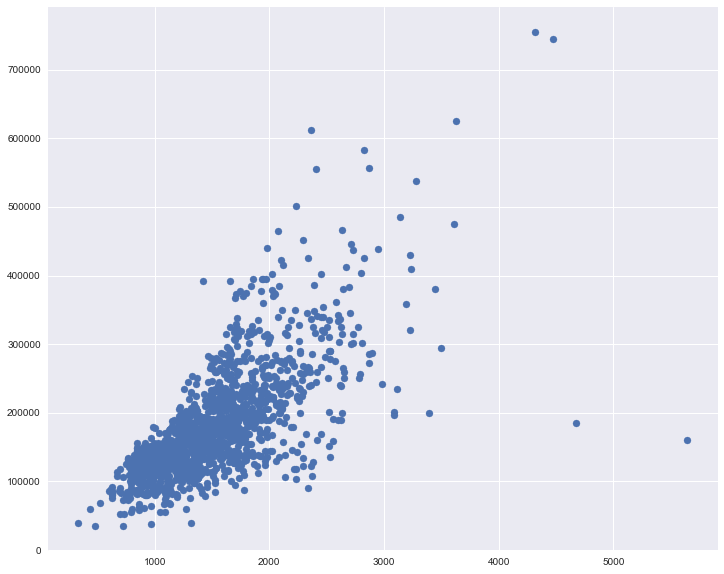

In [5]:
#Plot of GrLivArea feature to remove any outliers
plt.figure(figsize = (12, 10))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [6]:
#Removal of the outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 700000)].index)

In [7]:
#Joining train and test datasets
train_shape = train.shape
test_shape = test.shape
train_salePrice = train['SalePrice']
dataset = pd.concat((train, test)).reset_index(drop = True)

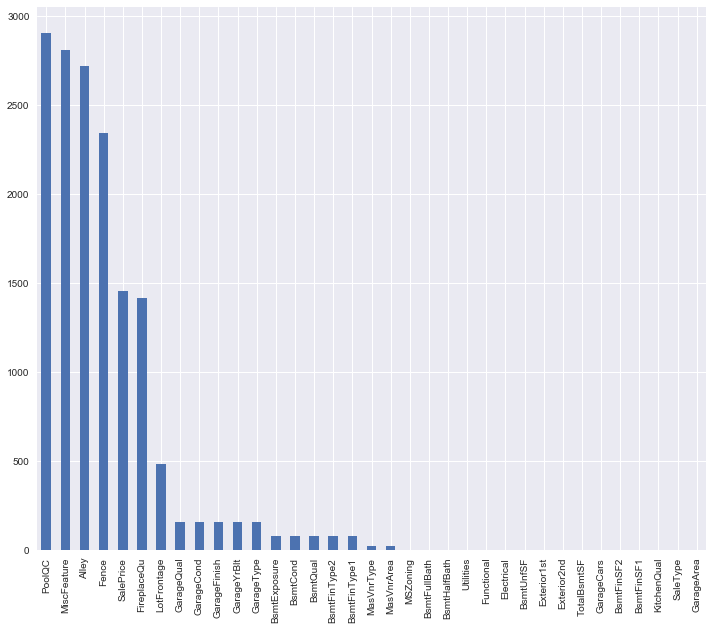

In [8]:
#Plot of columns that have NaN values
nan_columns = [column for column in dataset.columns if dataset[column].isnull().values.any()]
plt.figure(figsize = (12, 10))
dataset[nan_columns].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [9]:
#This function takes in input a dataset, a column, a variable and converts the columns values in 0 or 1
#and finally removes the column of the variable given in input (to avoid the "Dummy Variable Trap")
def add_dummies(dataset, column, variable):
    tmp = pd.get_dummies(dataset[column])
    tmp = tmp.drop(variable, axis = 1)
    for col in tmp.columns:
        dataset[column + '_' + col] = tmp[col]
    return dataset.drop(column, axis = 1)

In [10]:
#categorical variable (convertible in ordinal variable)
dataset['PoolQC'] = dataset['PoolQC'].fillna(0)
d = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
dataset['PoolQC'] = dataset['PoolQC'].replace(d)

In [11]:
#categorical variable (use pd.get_dummies() and remove NA column)
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NA')
dataset = add_dummies(dataset, 'MiscFeature', 'NA')

In [12]:
#categorical variable (use pd.get_dummies() and remove NA column)
dataset['Alley'] = dataset['Alley'].fillna('NA')
dataset = add_dummies(dataset, 'Alley', 'NA')

In [13]:
#categorical variable (use pd.get_dummies() and remove NA column)
dataset['Fence'] = dataset['Fence'].fillna('NA')
dataset = add_dummies(dataset, 'Fence', 'NA')

In [14]:
#categorical variable (convertible in ordinal variable)
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(0)
d = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dataset['FireplaceQu'] = dataset['FireplaceQu'].replace(d)

In [15]:
#numeric variable (replace NaN values with the median due to the presence of outliers)
dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [16]:
#categorical variable (convertible in ordinal variable)
dataset['GarageQual'] = dataset['GarageQual'].fillna(0)
dataset['GarageCond'] = dataset['GarageCond'].fillna(0)
d = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dataset['GarageQual'] = dataset['GarageQual'].replace(d)
dataset['GarageCond'] = dataset['GarageCond'].replace(d)

In [17]:
#categorical variable (convertible in ordinal variable)
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(0)
d = {'Unf': 1, 'RFn': 2, 'Fin': 3}
dataset['GarageFinish'] = dataset['GarageFinish'].replace(d)

In [18]:
#numeric variable (replace NaN values with 0)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

In [19]:
#categorical variable (use pd.get_dummies() and remove NA column)
dataset['GarageType'] = dataset['GarageType'].fillna('NA')
dataset = add_dummies(dataset, 'GarageType', 'NA')

In [20]:
#categorical variable (convertible in ordinal variable)
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(0)
d = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
dataset['BsmtExposure'] = dataset['BsmtExposure'].replace(d)

In [21]:
#categorical variable (convertible in ordinal variable)
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(0)
dataset['BsmtQual'] = dataset['BsmtQual'].fillna(0)
d = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dataset['BsmtCond'] = dataset['BsmtCond'].replace(d)
dataset['BsmtQual'] = dataset['BsmtQual'].replace(d)

In [22]:
#categorical variable (convertible in ordinal variable)
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(0)
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(0)
d = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].replace(d)
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].replace(d)

In [23]:
#categorical variable (use pd.get_dummies() and remove None column)
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
dataset = add_dummies(dataset, 'MasVnrType', 'None')

In [24]:
#numeric variable (replace NaN values with 0)
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [25]:
#categorical variable (replace NaN values with the most frequent element because there are only 4 NaN values) and then
#use pd.get_dummies() and remove any column
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].value_counts().index[0])
dataset = add_dummies(dataset, 'MSZoning', 'C (all)')

In [26]:
#numeric variable (replace NaN values with 0 (most frequent element))
dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)

In [27]:
#remove Utilities column because all the elements are 'AllPub' and there are only 2 NaN values
dataset = dataset.drop('Utilities', axis = 1)

In [28]:
#categorical variable (replace NaN values with the most frequent element because there are only 2 NaN values) and then
#use pd.get_dummies() and remove any column
dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].value_counts().index[0])
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].value_counts().index[0])
dataset = add_dummies(dataset, 'Functional', 'Sev')
dataset = add_dummies(dataset, 'Electrical', 'Mix')

In [29]:
#numeric variable (replace NaN values with 0)
dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)

In [30]:
#categorical variable (replace NaN values with the most frequent element because there is only 1 NaN value) and then
#use pd.get_dummies() and remove any column
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].value_counts().index[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].value_counts().index[0])
dataset = add_dummies(dataset, 'Exterior1st', 'AsbShng')
dataset = add_dummies(dataset, 'Exterior2nd', 'AsphShn')

In [31]:
#numeric variable (replace NaN values with 0)
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)
dataset['GarageCars'] = dataset['GarageCars'].fillna(0)
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)
dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)

In [32]:
#categorical variable (convertible in ordinal variable)
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].value_counts().index[0])
d = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dataset['KitchenQual'] = dataset['KitchenQual'].replace(d)

In [33]:
#categorical variable (replace NaN values with the most frequent element because there is only 1 NaN value) and then
#use pd.get_dummies() and remove Oth column
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].value_counts().index[0])
dataset = add_dummies(dataset, 'SaleType', 'Oth')

In [34]:
#numeric variable (replace NaN values with 0)
dataset['GarageArea'] = dataset['GarageArea'].fillna(0)

In [35]:
#create a new column which contains the sum of TotalBsmtSF, 1stFlrSF, 2ndFlrSF (and remove them???)
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

In [36]:
#select only the non-numeric columns
dataset.select_dtypes(exclude = [np.number]).columns

Index(['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'ExterCond',
       'ExterQual', 'Foundation', 'Heating', 'HeatingQC', 'HouseStyle',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'Neighborhood',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'Street'],
      dtype='object')

In [37]:
#the following command converts each non-numeric column to a column that contains values of 0 or 1
for column in dataset.select_dtypes(exclude = [np.number]).columns:  
    dataset = add_dummies(dataset, column, dataset[column].value_counts().index[-1])

In [38]:
#deleting Id and SalePrice columns 
dataset = dataset.drop(['Id', 'SalePrice'], axis = 1)

In [39]:
#splitting the dataset
train = dataset[ : train_shape[0]]
test = dataset[train_shape[0] : ]

In [40]:
#check shapes of train and test
train.shape, test.shape

((1458, 221), (1459, 221))

## Checking the price distribution

In [41]:
from scipy import stats
from scipy.stats import norm, skew

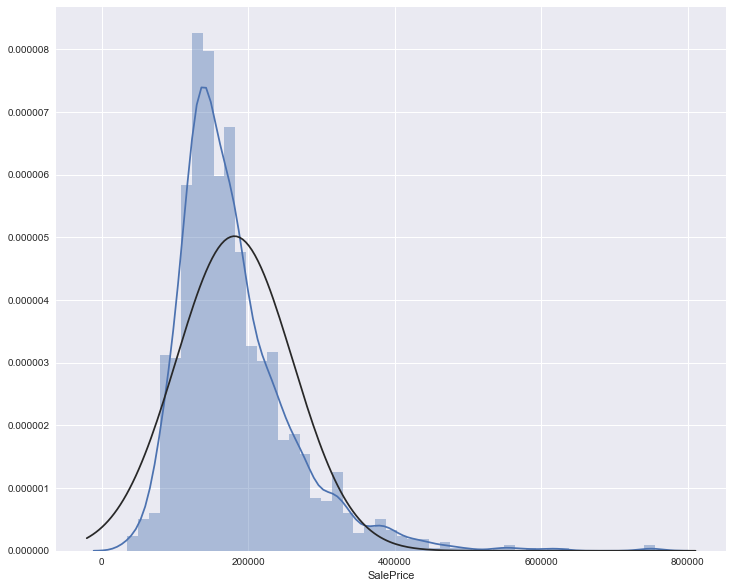

In [42]:
#Plot of the price distribution
plt.figure(figsize = (12, 10))
sns.distplot(train_salePrice , fit = norm)
plt.show()

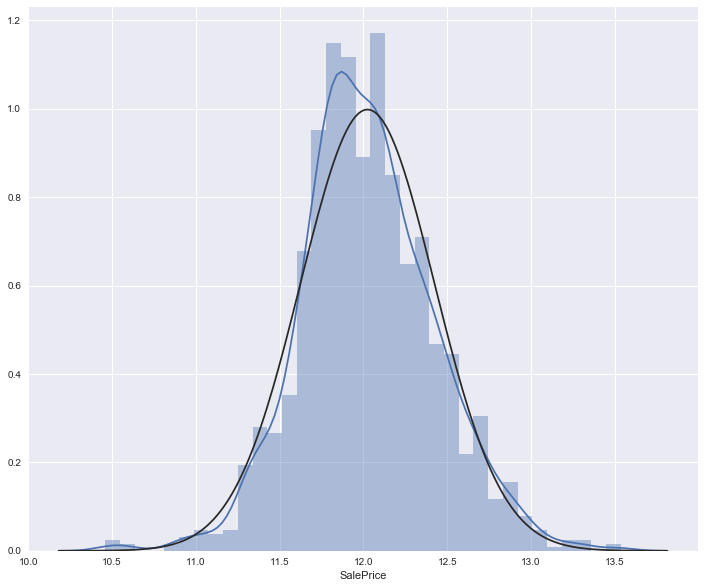

In [43]:
#Plot of the fixed distribution using the log(1 + x) transformation
plt.figure(figsize = (12, 10))
sns.distplot(np.log1p(train_salePrice) , fit = norm)
plt.show()

## Choosing the best regression model

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [45]:
X = train
y = np.log1p(train_salePrice.values)

In [46]:
scoring = 'neg_mean_squared_error'

In [47]:
#testing various regression algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('RIDGECV', RidgeCV()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

In [48]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in models:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:', cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: LR 	Mean: -1819608.05742 	Std: 1445897.2426
Model: LASSO 	Mean: -0.0286645300025 	Std: 0.00197649690107
Model: RIDGE 	Mean: -0.0149868593008 	Std: 0.00168963791679
Model: RIDGECV 	Mean: -0.0141995817959 	Std: 0.00173088421447
Model: EN 	Mean: -0.0260276836751 	Std: 0.001265117704
Model: CART 	Mean: -0.0460529015081 	Std: 0.00690217088458
Model: KNN 	Mean: -0.0500697029965 	Std: 0.00216564934924
Model: SVR 	Mean: -0.159430118714 	Std: 0.00780731227016

Best model: 	RIDGECV


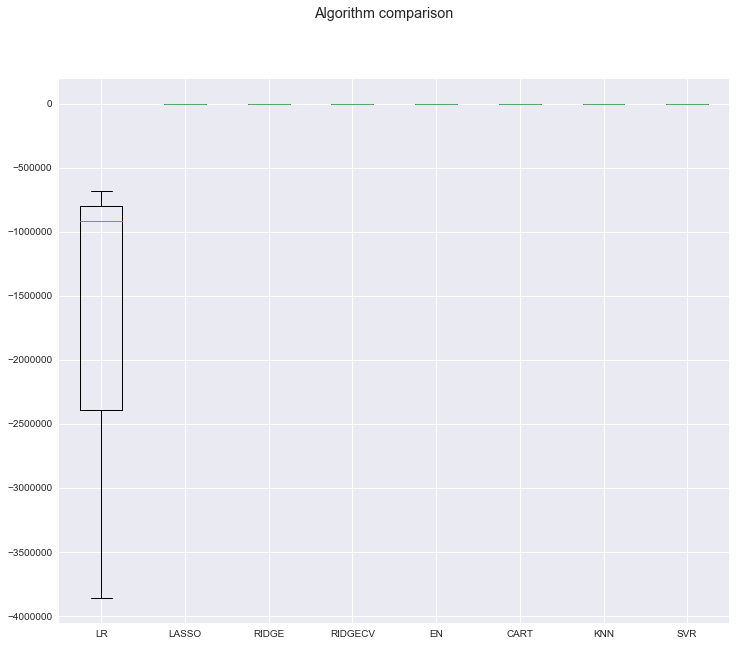

In [49]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
#testing various regression algorithms with the feature scaling
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', RobustScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', RobustScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', RobustScaler()), ('RIDGE', Ridge())])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', RobustScaler()), ('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', RobustScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', RobustScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', RobustScaler()), ('SVR', SVR())])))

In [51]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in pipelines:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: ScaledLR 	Mean: -0.0173013902502 	Std: 0.00156366059631
Model: ScaledLASSO 	Mean: -0.146724482513 	Std: 0.00840118089045
Model: ScaledRIDGE 	Mean: -0.014973876088 	Std: 0.00168904485104
Model: ScaledRIDGECV 	Mean: -0.0141239239275 	Std: 0.00175916288425
Model: ScaledEN 	Mean: -0.139779972082 	Std: 0.0072652159203
Model: ScaledCART 	Mean: -0.0457182410934 	Std: 0.00721146726122
Model: ScaledKNN 	Mean: -0.0601856399025 	Std: 0.0067526722702
Model: ScaledSVR 	Mean: -0.0487217984109 	Std: 0.00555879145018

Best model: 	ScaledRIDGECV


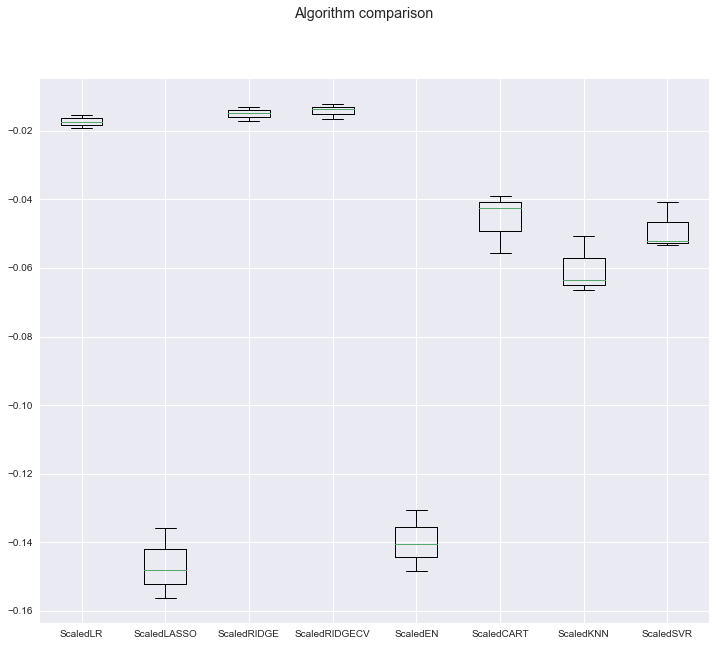

In [52]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
#RidgeCV tuning (finding the best alphas parameter)
alpha_values = []
value = 27.0
while value <= 30.0:
    alpha_values.append([value])
    value += 0.1
param_grid = dict(alphas = alpha_values)
kfold = KFold()
grid = GridSearchCV(estimator = RidgeCV(), param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X, y)

In [54]:
print('Best score: %f using %s\n' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
best_alpha = grid_result.best_params_['alphas']

Best score: -0.014049 using {'alphas': [27.60000000000001]}

-0.014049 (0.001703) with: {'alphas': [27.0]}
-0.014049 (0.001703) with: {'alphas': [27.1]}
-0.014049 (0.001703) with: {'alphas': [27.200000000000003]}
-0.014049 (0.001703) with: {'alphas': [27.300000000000004]}
-0.014049 (0.001703) with: {'alphas': [27.400000000000006]}
-0.014049 (0.001703) with: {'alphas': [27.500000000000007]}
-0.014049 (0.001703) with: {'alphas': [27.60000000000001]}
-0.014049 (0.001703) with: {'alphas': [27.70000000000001]}
-0.014049 (0.001703) with: {'alphas': [27.80000000000001]}
-0.014049 (0.001703) with: {'alphas': [27.900000000000013]}
-0.014049 (0.001703) with: {'alphas': [28.000000000000014]}
-0.014049 (0.001703) with: {'alphas': [28.100000000000016]}
-0.014049 (0.001703) with: {'alphas': [28.200000000000017]}
-0.014049 (0.001703) with: {'alphas': [28.30000000000002]}
-0.014049 (0.001703) with: {'alphas': [28.40000000000002]}
-0.014049 (0.001703) with: {'alphas': [28.50000000000002]}
-0.014049 (0.

In [55]:
#testing various boosting algorithms
models = []
models.append(('AB', AdaBoostRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))

In [56]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in models:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: AB 	Mean: -0.0266795034394 	Std: 0.00140483153711
Model: GBM 	Mean: -0.0160324081183 	Std: 0.00222041575861
Model: RF 	Mean: -0.0215683658089 	Std: 0.00178222934373
Model: ET 	Mean: -0.0204389951621 	Std: 0.00286586429947

Best model: 	GBM


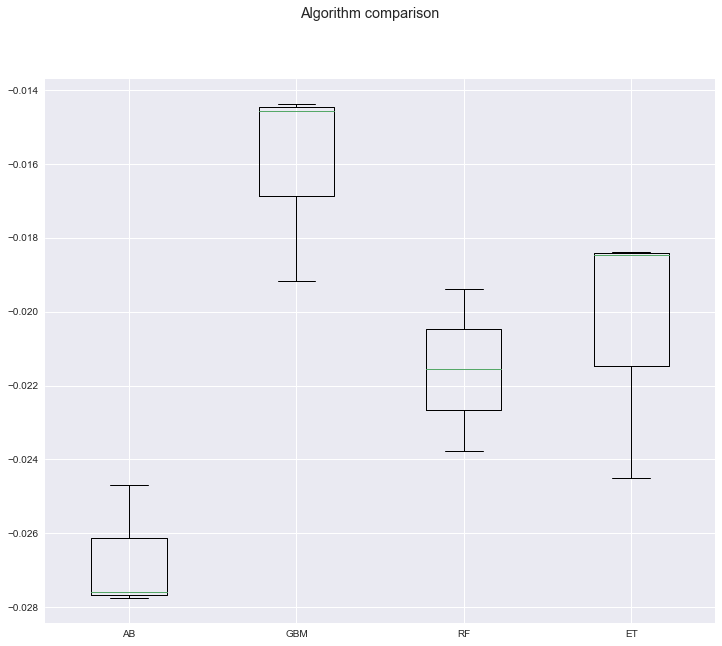

In [57]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [58]:
#testing various boosting algorithms with the feature scaling
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', RobustScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', RobustScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', RobustScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', RobustScaler()),('ET', ExtraTreesRegressor())])))

In [59]:
results = []
names = []
m, model_name = float('-inf'), ''
for name, model in ensembles:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:',cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name
print('\nBest model:', '\t' + model_name)

Model: ScaledAB 	Mean: -0.0261320602377 	Std: 0.00185288974463
Model: ScaledGBM 	Mean: -0.0161713975303 	Std: 0.00222554694002
Model: ScaledRF 	Mean: -0.0217614533893 	Std: 0.00246524431245
Model: ScaledET 	Mean: -0.0199495679269 	Std: 0.00272065424789

Best model: 	ScaledGBM


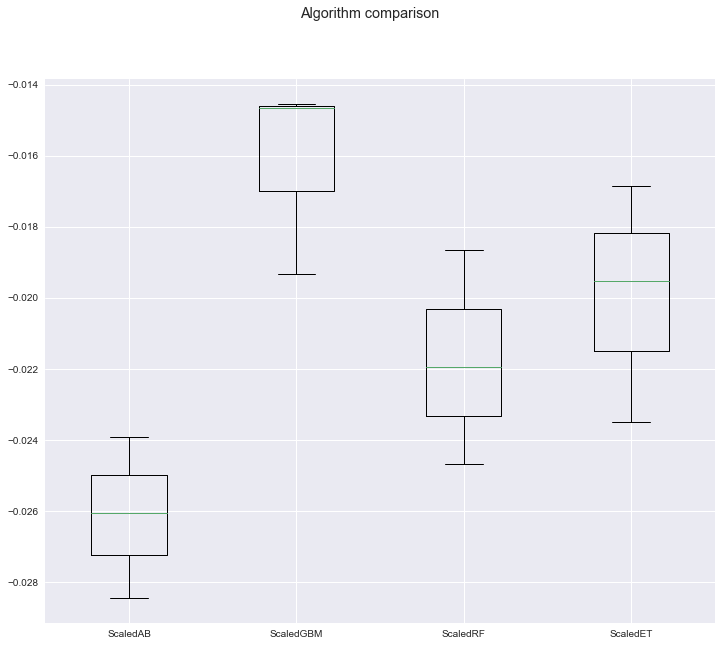

In [60]:
#Plot of the statistical distribution of the chosen algorithms
fig = plt.figure(figsize = (12, 10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
#GBM tuning (finding the best n_estimators parameter)
#param_grid = dict(n_estimators = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
#param_grid = dict(n_estimators = np.array([350, 360, 370, 380, 390, 400]))
param_grid = dict(n_estimators = np.array([350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400]))
model = GradientBoostingRegressor()
kfold = KFold()
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X, y)

In [62]:
print('Best score: %f using %s\n' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    
best_n_estimators = grid_result.best_params_['n_estimators']

Best score: -0.015783 using {'n_estimators': 395}

-0.015898 (0.002318) with: {'n_estimators': 350}
-0.015918 (0.002435) with: {'n_estimators': 355}
-0.015961 (0.002283) with: {'n_estimators': 360}
-0.015829 (0.002382) with: {'n_estimators': 365}
-0.015968 (0.002365) with: {'n_estimators': 370}
-0.016061 (0.002243) with: {'n_estimators': 375}
-0.016020 (0.002351) with: {'n_estimators': 380}
-0.015838 (0.002330) with: {'n_estimators': 385}
-0.015879 (0.002401) with: {'n_estimators': 390}
-0.015783 (0.002350) with: {'n_estimators': 395}
-0.015936 (0.002292) with: {'n_estimators': 400}


## Using the ensemble method

In [63]:
#ensembling RidgeCV (70%) and Gradient Boosting (30%) without feature scaling
print('Predicting house prices with:\n')
print('RidgeCV(alphas = ' + str(best_alpha) + ')')
print('GradientBoostingRegressor(n_estimators = '+ str(best_n_estimators) + ')')

ridge_cv = RidgeCV(alphas = best_alpha)
ridge_cv_predictions = ridge_cv.fit(X, y).predict(test)

gbm = GradientBoostingRegressor(n_estimators = best_n_estimators)
gbm_predictions = gbm.fit(X, y).predict(test)

predictions = np.expm1(ridge_cv_predictions) * 0.7 + np.expm1(gbm_predictions) * 0.3

Predicting house prices with:

RidgeCV(alphas = [27.60000000000001])
GradientBoostingRegressor(n_estimators = 395)


## Saving the predictions

In [64]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index = False)

Final score: 0.11752